# Unicorn Companies Analysis
In this project we explore various features like country, city and Industry and other extra factors such as population, GDP and GDP per capita of the company’s origin country, which can lead to a change the point of views of some important pointers such as valuation, Investors and total money raised in a unicorn company.

In this project we work on 2 data sets        
=> One of that is about current unicorn companies. We got this data set from Kaggle, which contains numerous company names and its other features such as valuation, funding and so on. The link to this data set is provided below:     
https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset    
=> The next data set we work on in this project contains various economic features of the country like GDP and extra factors like population. The link to this data set is provided as follows:     
https://worldpopulationreview.com/countries/countries-by-gdp

We will also be working on various questions, which can clearly explain various judgments we have based on these data sets.

In [1]:
import pandas as pd
import io
import requests
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Reading the Data

In [2]:
#In this case we read the data from the gig hub, where the data is in CSV format and can be directly accessed.

In [3]:
#Reading the data, where Unicron data is stored in a df data frame, which is currently in raw format.
url='https://raw.githubusercontent.com/sushanth23k/Project_2_601/main/Unicorn_Companies.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.shape

(1037, 13)

In [4]:
#Here similarly, GDP data is stored in df1 data frame, which is currently in raw format.
url='https://raw.githubusercontent.com/sushanth23k/Project_2_601/main/csvData.csv'
s=requests.get(url).content
df1=pd.read_csv(io.StringIO(s.decode('utf-8')))
df1.shape

(211, 6)

In [5]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [6]:
df1.head()

,rank,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,United States,2.219812e+13,18624475000000,66301.5850,334805.269
1,2,China,1.546810e+13,11218281029298,10678.9130,1448471.400
2,3,Japan,5.495420e+12,4936211827875,43758.6263,125584.838
3,4,Germany,4.157120e+12,3477796274497,49558.1997,83883.596
4,5,India,3.257720e+12,2259642382872,2315.9721,1406631.776


# Cleaning

In [7]:
df1.isna().sum()

rank            0
country         0
imfGDP          0
unGDP           0
gdpPerCapita    0
pop             0
dtype: int64

In [8]:
df.isna().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
dtype: int64

In [9]:

modify=lambda x: float(x.split('$')[1].split('B')[0])*1000000 if (x[len(x)-1]=='B') else ( float(x.split('$')[1].split('M')[0])*1000 if (x[len(x)-1]=='M') else ( 0 if (x == 'None') else float(x.split('$')[1].split('K')[0])))

#Frist we remove the $ sign from the Valuation column.
df['Valuation ($B)']=[x.split('$')[1] for x in df['Valuation ($B)'].tolist()] 

#Next, we remove the $ along with its other characters like 'M', 'K' so on and convert the data into 100000 format i.e 'K'.
df['Total Raised']=[modify(x) for x in df['Total Raised'].tolist()] 
df.rename({'Total Raised': 'Total Raised ($K)'}, axis=1, inplace=True)

#Convert the Portfolio Exits, Investors Count and Deal Terms to 0 if it's none.
df['Portfolio Exits']=[0  if(x=='None') else x for x in df['Portfolio Exits'].tolist()]
df['Investors Count']=[0  if(x=='None') else x for x in df['Investors Count'].tolist()]
df['Deal Terms']=[0  if(x=='None') else x for x in df['Deal Terms'].tolist()]

#Finally, we convert the numeric columns to int and float data columns, i.e into their respective data type and then we convert 
#these columns to numeric data set.
df.astype({'Valuation ($B)':float,'Total Raised ($K)':float,'Investors Count':int,'Deal Terms':int,'Portfolio Exits':int})
df[['Valuation ($B)','Total Raised ($K)','Investors Count','Deal Terms','Portfolio Exits']]=df[['Valuation ($B)','Total Raised ($K)','Investors Count','Deal Terms','Portfolio Exits']].apply(pd.to_numeric)
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised ($K),Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7440000.0,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6874000.0,None,29,12,0
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2901000.0,Asset,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3472000.0,Acquired,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4377000.0,Acquired,25,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,181060.0,None,7,2,0
1033,Scalapay,1.0,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,700000.0,None,10,2,0
1034,Omada Health,1.0,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,449720.0,None,30,6,0
1035,BlueVoyant,1.0,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,525500.0,None,6,2,0


# **Exploratory Data Analysis**

#### Overview of data types of each columns in the dataframe

In [10]:
df.dtypes

Company               object
Valuation ($B)       float64
Date Joined           object
Country               object
City                  object
Industry              object
Select Inverstors     object
Founded Year          object
Total Raised ($K)    float64
Financial Stage       object
Investors Count        int64
Deal Terms             int64
Portfolio Exits        int64
dtype: object

In [11]:
df1.dtypes

rank              int64
country          object
imfGDP          float64
unGDP             int64
gdpPerCapita    float64
pop             float64
dtype: object

#### Show numeric data types in dataframe

In [12]:
df.select_dtypes(include=['number'])

,Valuation ($B),Total Raised ($K),Investors Count,Deal Terms,Portfolio Exits
0,140.0,7440000.0,28,8,5
1,100.3,6874000.0,29,12,0
2,95.0,2901000.0,39,12,1
3,45.6,3472000.0,56,13,1
4,42.0,4377000.0,25,5,2
...,...,...,...,...,...
1032,1.0,181060.0,7,2,0
1033,1.0,700000.0,10,2,0
1034,1.0,449720.0,30,6,0
1035,1.0,525500.0,6,2,0


In [13]:
df1.select_dtypes(include=['number'])

,rank,imfGDP,unGDP,gdpPerCapita,pop
0,1,2.219812e+13,18624475000000,66301.5850,334805.269
1,2,1.546810e+13,11218281029298,10678.9130,1448471.400
2,3,5.495420e+12,4936211827875,43758.6263,125584.838
3,4,4.157120e+12,3477796274497,49558.1997,83883.596
4,5,3.257720e+12,2259642382872,2315.9721,1406631.776
...,...,...,...,...,...
206,207,0.000000e+00,282506007859,1231.0220,229488.994
207,208,0.000000e+00,337520470,22161.5542,15.230
208,209,0.000000e+00,82887395895,1802.2126,45992.020
209,210,0.000000e+00,22163075121,1144.5026,19364.809


# Question and answers along with their Visualizations

### Q1) Are the top 10 countries with the highest GDP, the top 10 countries with the most number of unicorns? 

In [14]:
#First we get the top 10 countries with the highest GDP, next we get the top 10 countries with the most number of unicorns.
df10=df1.head(10)
df10.index=df10['country'].tolist()
df11=df.groupby('Country').size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
df10

,rank,country,imfGDP,unGDP,gdpPerCapita,pop
United States,1,United States,2.219812e+13,18624475000000,66301.5850,334805.269
China,2,China,1.546810e+13,11218281029298,10678.9130,1448471.400
Japan,3,Japan,5.495420e+12,4936211827875,43758.6263,125584.838
Germany,4,Germany,4.157120e+12,3477796274497,49558.1997,83883.596
India,5,India,3.257720e+12,2259642382872,2315.9721,1406631.776
United Kingdom,6,United Kingdom,2.927080e+12,2647898654635,42732.4006,68497.907
France,7,France,2.876050e+12,2465453975282,43852.5751,65584.518
Italy,8,Italy,2.090450e+12,1858913163928,34688.9132,60262.770
Brazil,9,Brazil,2.062500e+12,1795925681016,9577.2723,215353.593
Canada,10,Canada,1.832490e+12,1529760492201,47735.4902,38388.419


c:\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


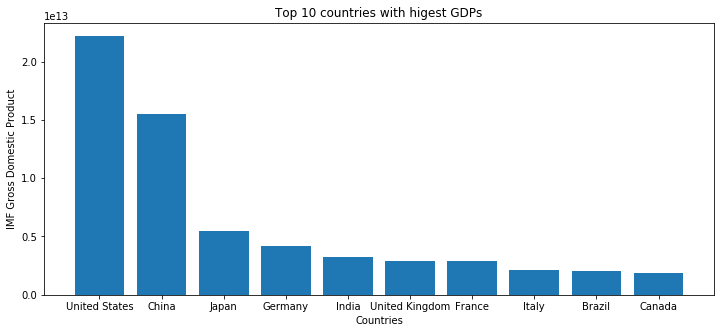

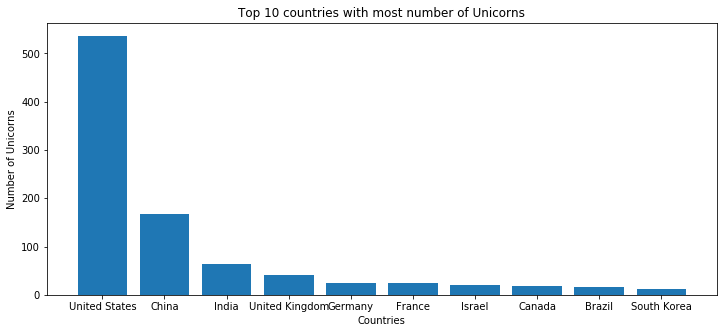

In [15]:
#Modifying the font of the graph.
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

#First we get the top 10 countries with the highest GDP graph.
fig = plt.figure(figsize = (12, 5))
plt.bar(df10['country'],df10['imfGDP'])
plt.xlabel("Countries")
plt.ylabel("IMF Gross Domestic Product")
plt.title("Top 10 countries with higest GDPs")
plt.show()

#Next we get the top 10 countries with the most number of unicorns.
fig = plt.figure(figsize = (12, 5))
plt.bar(df11['Country'],df11['counts'])
plt.xlabel("Countries")
plt.ylabel("Number of Unicorns")
plt.title("Top 10 countries with most number of Unicorns")
plt.show()

##### False, not same countries
We can see from the above graph top 10 countries with the highest GDP are not the top 10 countries with the most number of unicorns. The list is same till China, then the diffrence begins.
So the answer is No.

### Q2) If the first question is false, the countries with an exception are more or less than 3 in number?

In [16]:
#We then modify the index of the graphs.
df10=df10.reset_index()
df10['pos_gdp']=range(1,len(df10)+1)
df11['pos_uniocorns']=range(1,len(df11)+1)

In [17]:
#Next we rename the column of the country in unicorn data so that we can merge the data. Next, we merge both data based on the 
#country and change new data set index to country.
df11.rename(columns = {'Country':'country'}, inplace = True)
result = pd.merge(df10,df11, how="outer", on='country')
result.index=result['country'].tolist()

<Figure size 432x288 with 0 Axes>

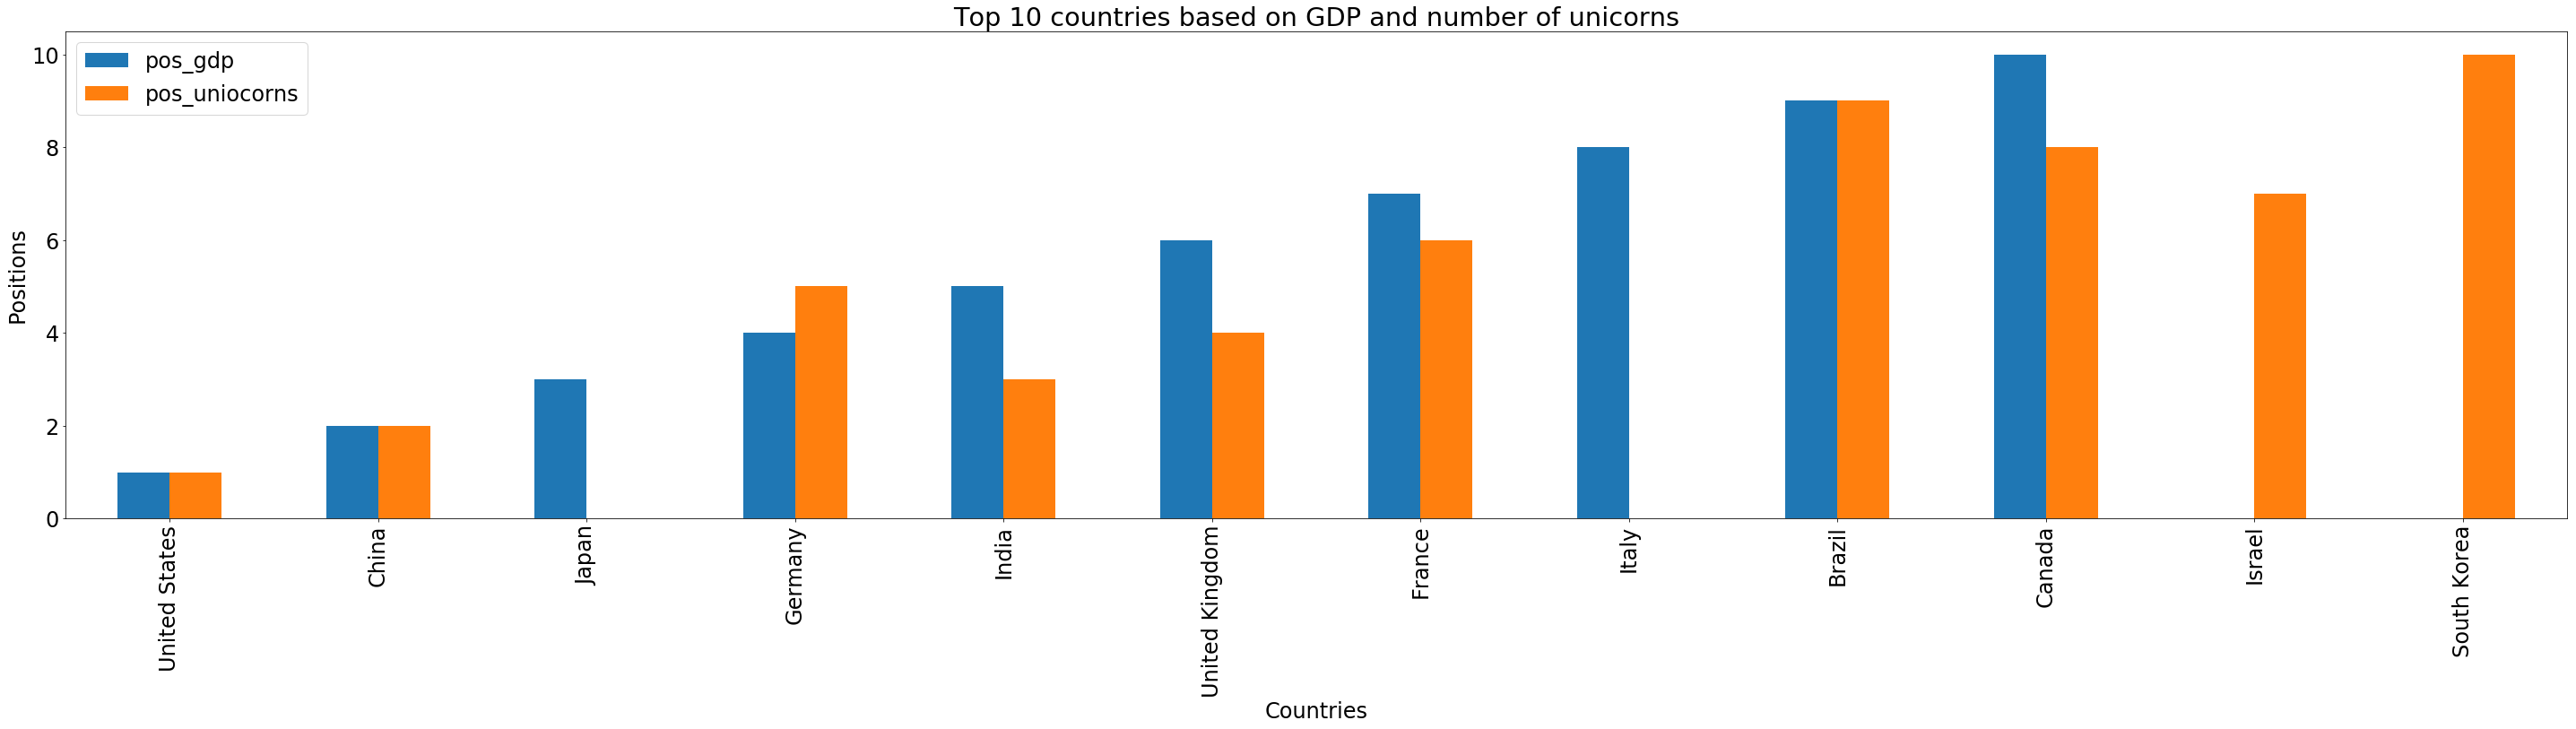

In [18]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)

#Finally we plot the data with the combined data.
fig = plt.figure()
result[['pos_gdp','pos_uniocorns']].plot.bar(figsize = (50, 10))
plt.xlabel("Countries")
plt.ylabel("Positions")
plt.title("Top 10 countries based on GDP and number of unicorns")
plt.show() 

#### Greater than 3 countries
We can see from the above graph that countries like Japan and Italy have GDP, in the top 10 but is not in the top 10 with the highest number of unicorns. Vice versa for Isreal and South Korea.

### Q3) Do china and USA have half of all unicorns in the world?

{1: 'United States', 2: 'China', 3: 'India', 4: 'United Kingdom', 5: 'Germany', 6: 'France', 7: 'Israel', 8: 'Canada', 9: 'Brazil', 10: 'South Korea', 11: 'Singapore', 12: 'Indonesia', 13: 'Australia', 14: 'Netherlands', 15: 'Mexico', 16: 'Sweden', 17: 'Hong Kong', 18: 'Japan', 19: 'Switzerland', 20: 'Ireland', 21: 'Norway', 22: 'Turkey', 23: 'Spain', 24: 'United Arab Emirates', 25: 'Belgium', 26: 'Finland', 27: 'Thailand', 28: 'Chile', 29: 'South Africa', 30: 'Colombia', 31: 'Estonia', 32: 'Denmark', 33: 'Philippines', 34: 'Austria', 35: 'Vietnam', 36: 'Argentina', 37: 'Senegal', 38: 'Nigeria', 39: 'Malaysia', 40: 'Luxembourg', 41: 'Lithuania', 42: 'Czech Republic', 43: 'Croatia', 44: 'Bermuda', 45: 'Bahamas', 46: 'Italy'} 

 {1: 51.69, 2: 16.2, 3: 6.08, 4: 4.05, 5: 2.31, 6: 2.31, 7: 1.93, 8: 1.83, 9: 1.54, 10: 1.16, 11: 1.16, 12: 0.68, 13: 0.58, 14: 0.58, 15: 0.58, 16: 0.58, 17: 0.58, 18: 0.58, 19: 0.48, 20: 0.48, 21: 0.39, 22: 0.29, 23: 0.29, 24: 0.29, 25: 0.29, 26: 0.29, 27: 0.19, 

Text(0.5, 1.0, 'Countries with their respective share in unicorns of the world')

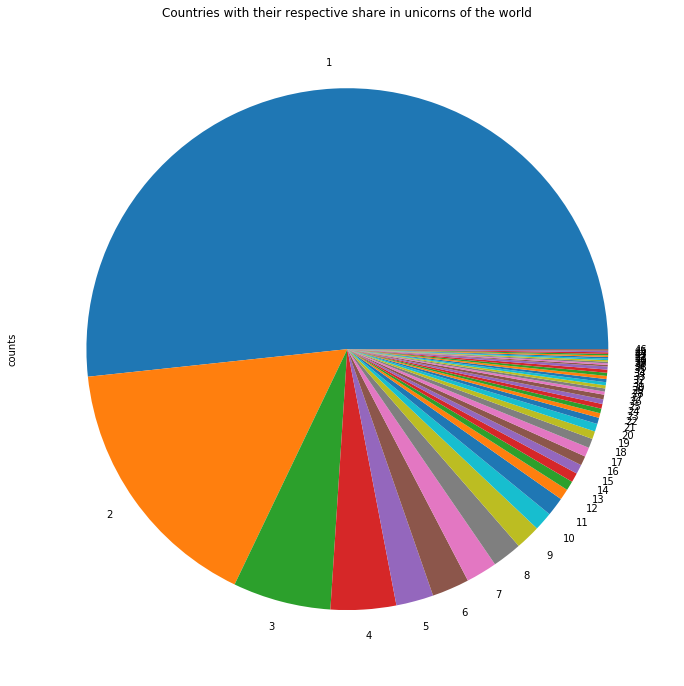

In [19]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

# We first count the number of unicorns in each country and place it in the count's column.
df12=df.groupby('Country').size().reset_index(name='counts').sort_values('counts', ascending=False)
df12.index=range(1,len(df12)+1)

#Next we find the percentage of the unicorns present in each country and print it with the numbers designated to the country.
df12['percentage'] =round(df12['counts'] / df12['counts'].sum() * 100,2)
countries=df12[['Country','percentage']].to_dict()
print(countries['Country'],'\n\n',countries['percentage'])

#Finally we display the graph based on the count of unicorns.
df12['counts'].plot(kind='pie', y='votes_of_each_class',figsize = (70, 12))
plt.title("Countries with their respective share in unicorns of the world")

#### True
In fact, the USA itself has more than half the number of Unicorns. Combined USA and China have 67.89 i.e two-thirds of all the unicorn companies present in the world.

### Q4) There is no company with more than 10 billion  in valuation with less than 500 million  in total funding. Is it true?

c:\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<Figure size 2160x720 with 0 Axes>

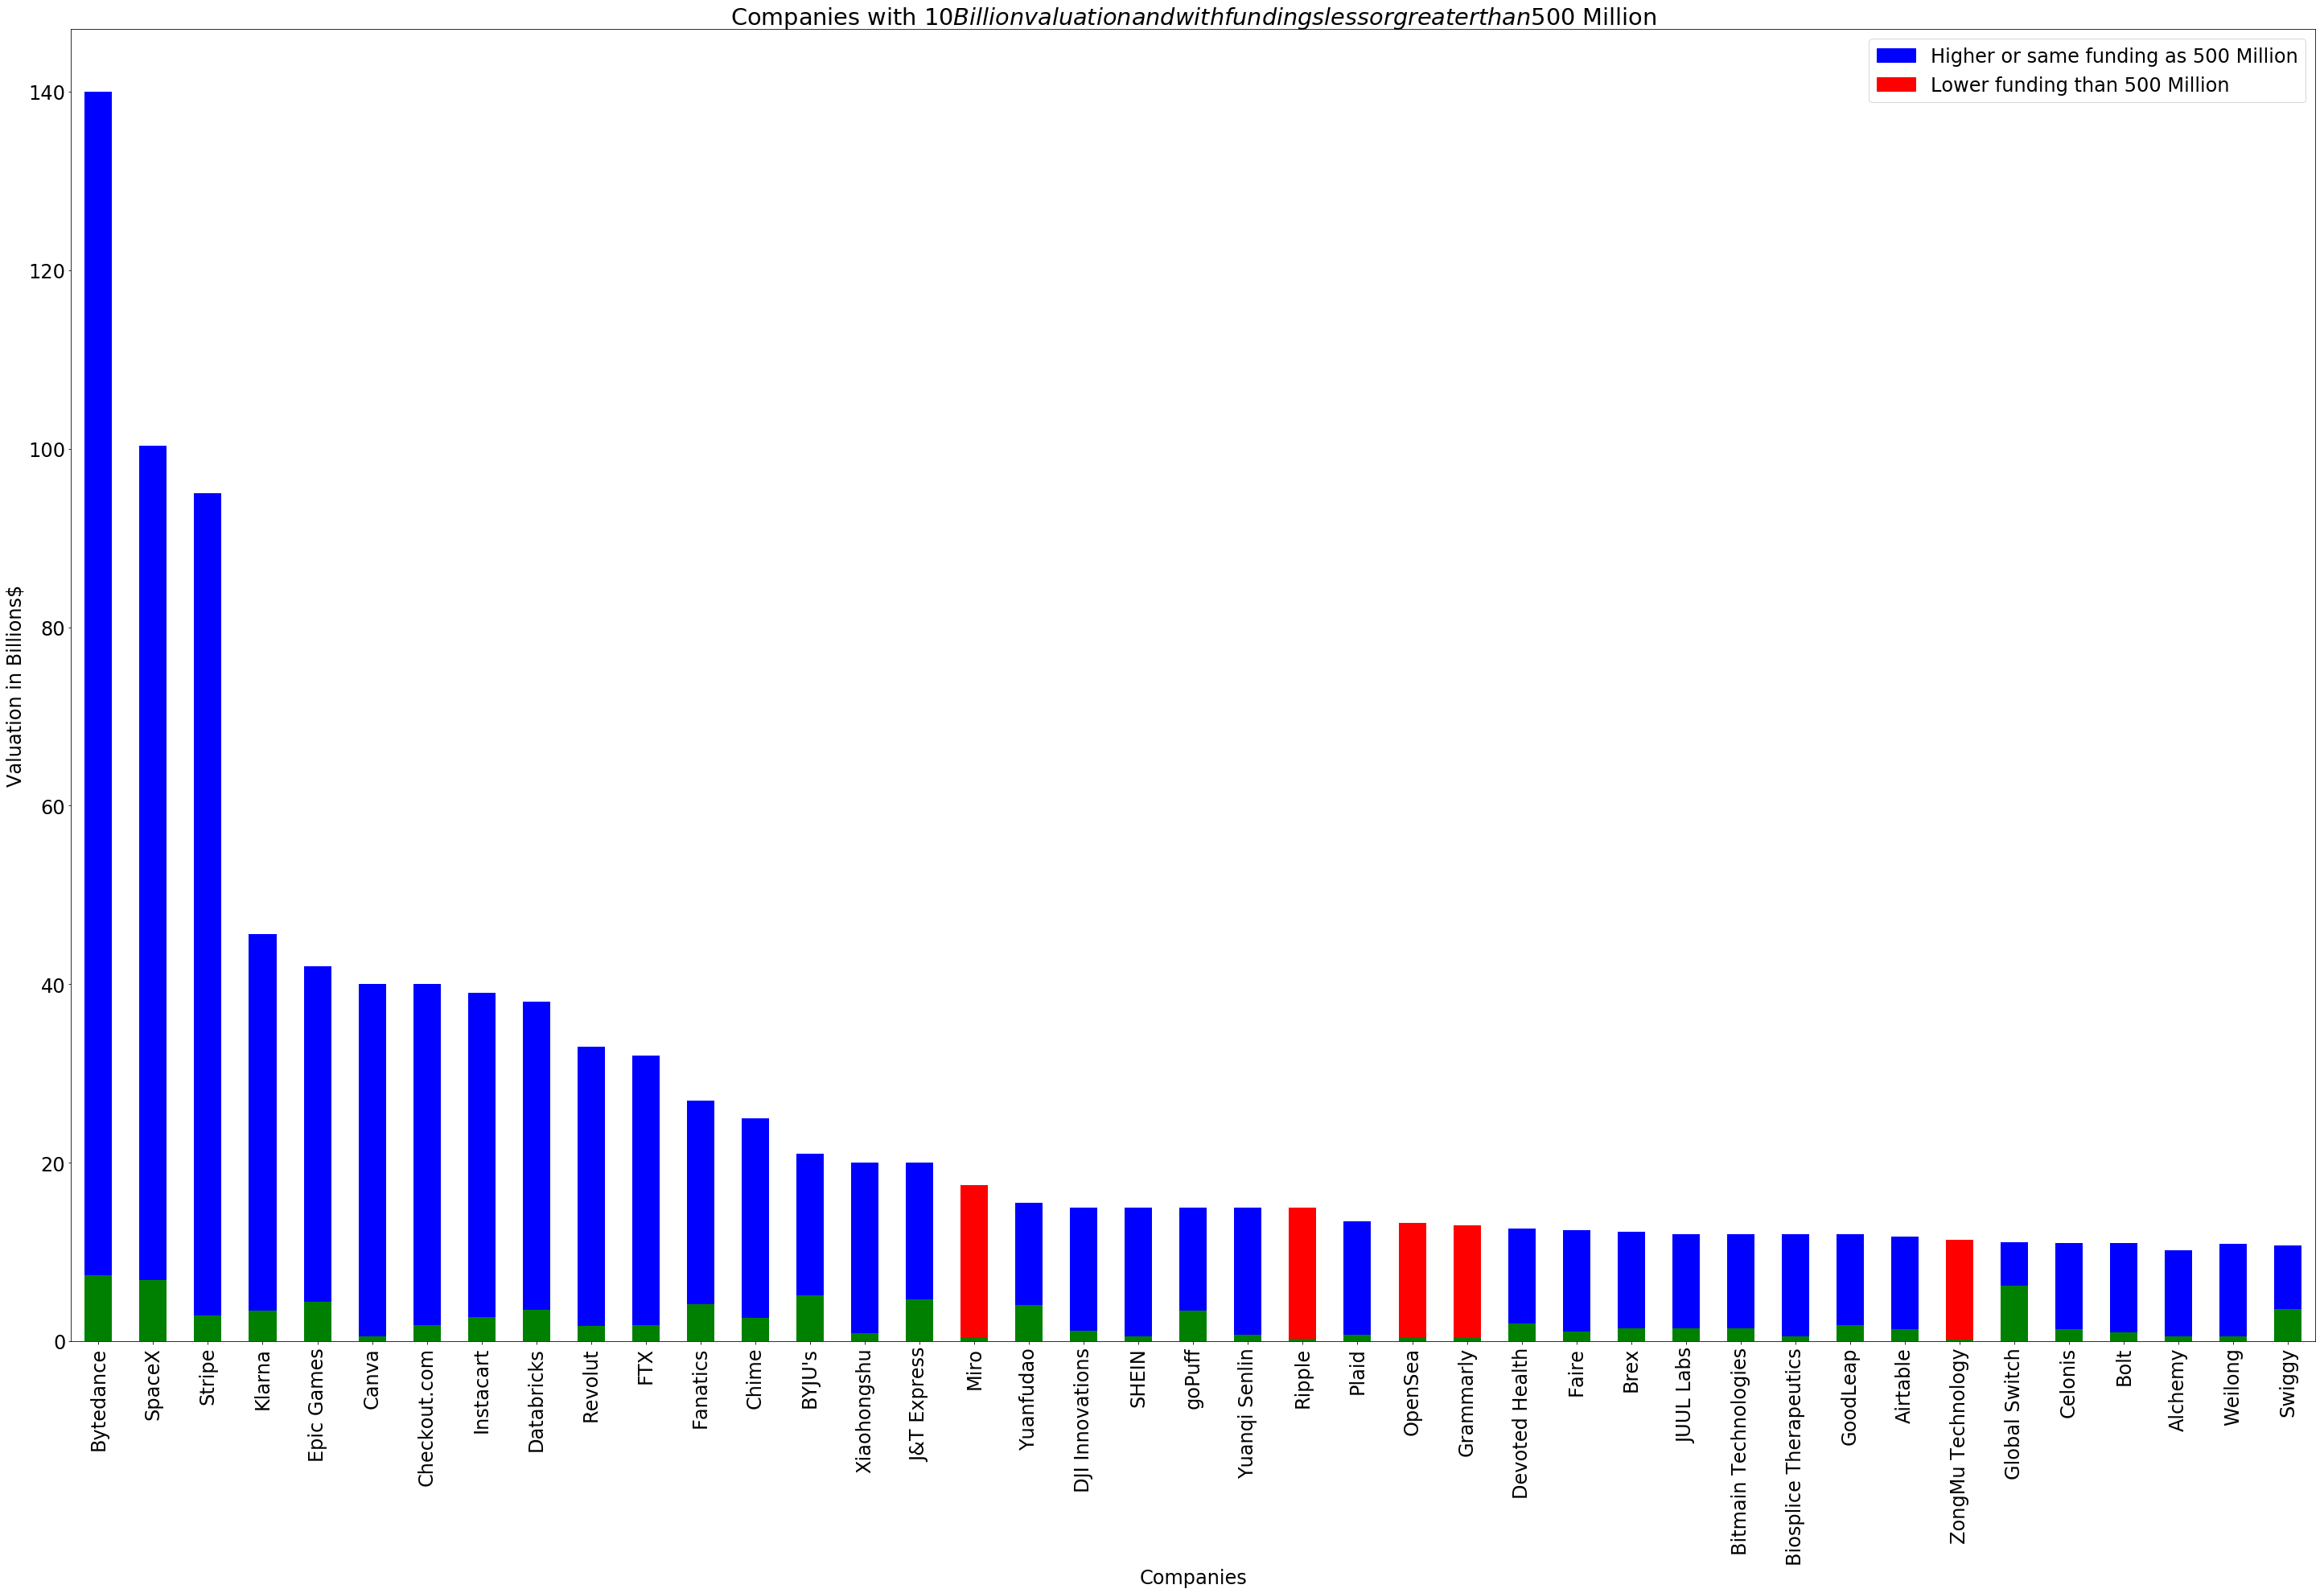

In [20]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
plt.figure(figsize=(30,10))

#We first find the companies with a valuation of more than 10 billion.
df13=df[df['Valuation ($B)']>10]

#Next we place the colour red for companies that raised less than 500 million in funding i.e total funding raised.
condition= ['blue' if (x>=500000.0) else 'red' for x in df13['Total Raised ($K)']]

#We then convert the funding money format from 100000 i.e (K) to billion.
df13.index=df13['Company'].tolist()
df13['Total Raised ($K)']=[x/1000000 for x in df13['Total Raised ($K)']]

#Next we plot the graph by combining the valuation and funding graph with funding data as green.
plt.figure(figsize=(50,30)) 
ax=df13['Valuation ($B)'].plot.bar(color=condition)
df13['Total Raised ($K)'].plot.bar(color='green',ax=ax)

#We label the graph with respective names.
plt.xlabel("Companies")
plt.ylabel("Valuation in Billions$")
plt.title("Companies with 10$ Billion valuation and with fundings less or greater than 500$ Million")

red = mpatches.Patch(color='#FF0000', label='Lower funding than 500 Million')
blue = mpatches.Patch(color='#0000FF', label='Higher or same funding as 500 Million')
plt.legend(handles=[blue,red])
plt.show()

#### False
We can see from the graph that the companies like Miro, Ripple, OpenSea and so on have less than half a billion in funding but are valued at more than 10$ billion.

### Q5) Beijing has more unicorns between 2018 and 2020 than San Francisco in the same period. Is it the other way around?

In [21]:
#We first get the data joined and city data from the main data set.
df14=df[['Date Joined','City']]

#We next get the joined year from joined date.
df14['Joined Year']=[int(pd.to_datetime(x).year) for x in df14['Date Joined']]

#Next, we get the data of cities we require i.e Beijing and San Francisco.
df14=df14[df14['City'].isin(['Beijing','San Francisco'])].sort_values(['Joined Year'])

#Then we find the number of unicorns of both the cities in all the years they produce unicorns. 
df14=df14.groupby(['Joined Year','City']).size().reset_index(name='unicorns')

#Then we find the number of unicorns for every 3-year duration in both the cities into a list of lists.
Range_unicorns=[[df14[(df14['Joined Year'].isin([x,x+1,x+2]))&(df14['City']=='Beijing')]['unicorns'].sum(),
                df14[(df14['Joined Year'].isin([x,x+1,x+2]))&(df14['City']=='San Francisco')]['unicorns'].sum(),
                str(x)+'-'+str(x+2)] for x in range(2012,2022,3)]

#We then convert the list of lists to a data frame.
df15= pd.DataFrame(Range_unicorns, columns = ['Beijing','San Francisco','Year duration'])

#We finally place the year's subset to the index of the data set.
df15.index=df15['Year duration'].tolist()
df15

c:\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Beijing,San Francisco,Year duration
2012-2014,1,4,2012-2014
2015-2017,24,7,2015-2017
2018-2020,25,39,2018-2020
2021-2023,13,95,2021-2023


c:\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


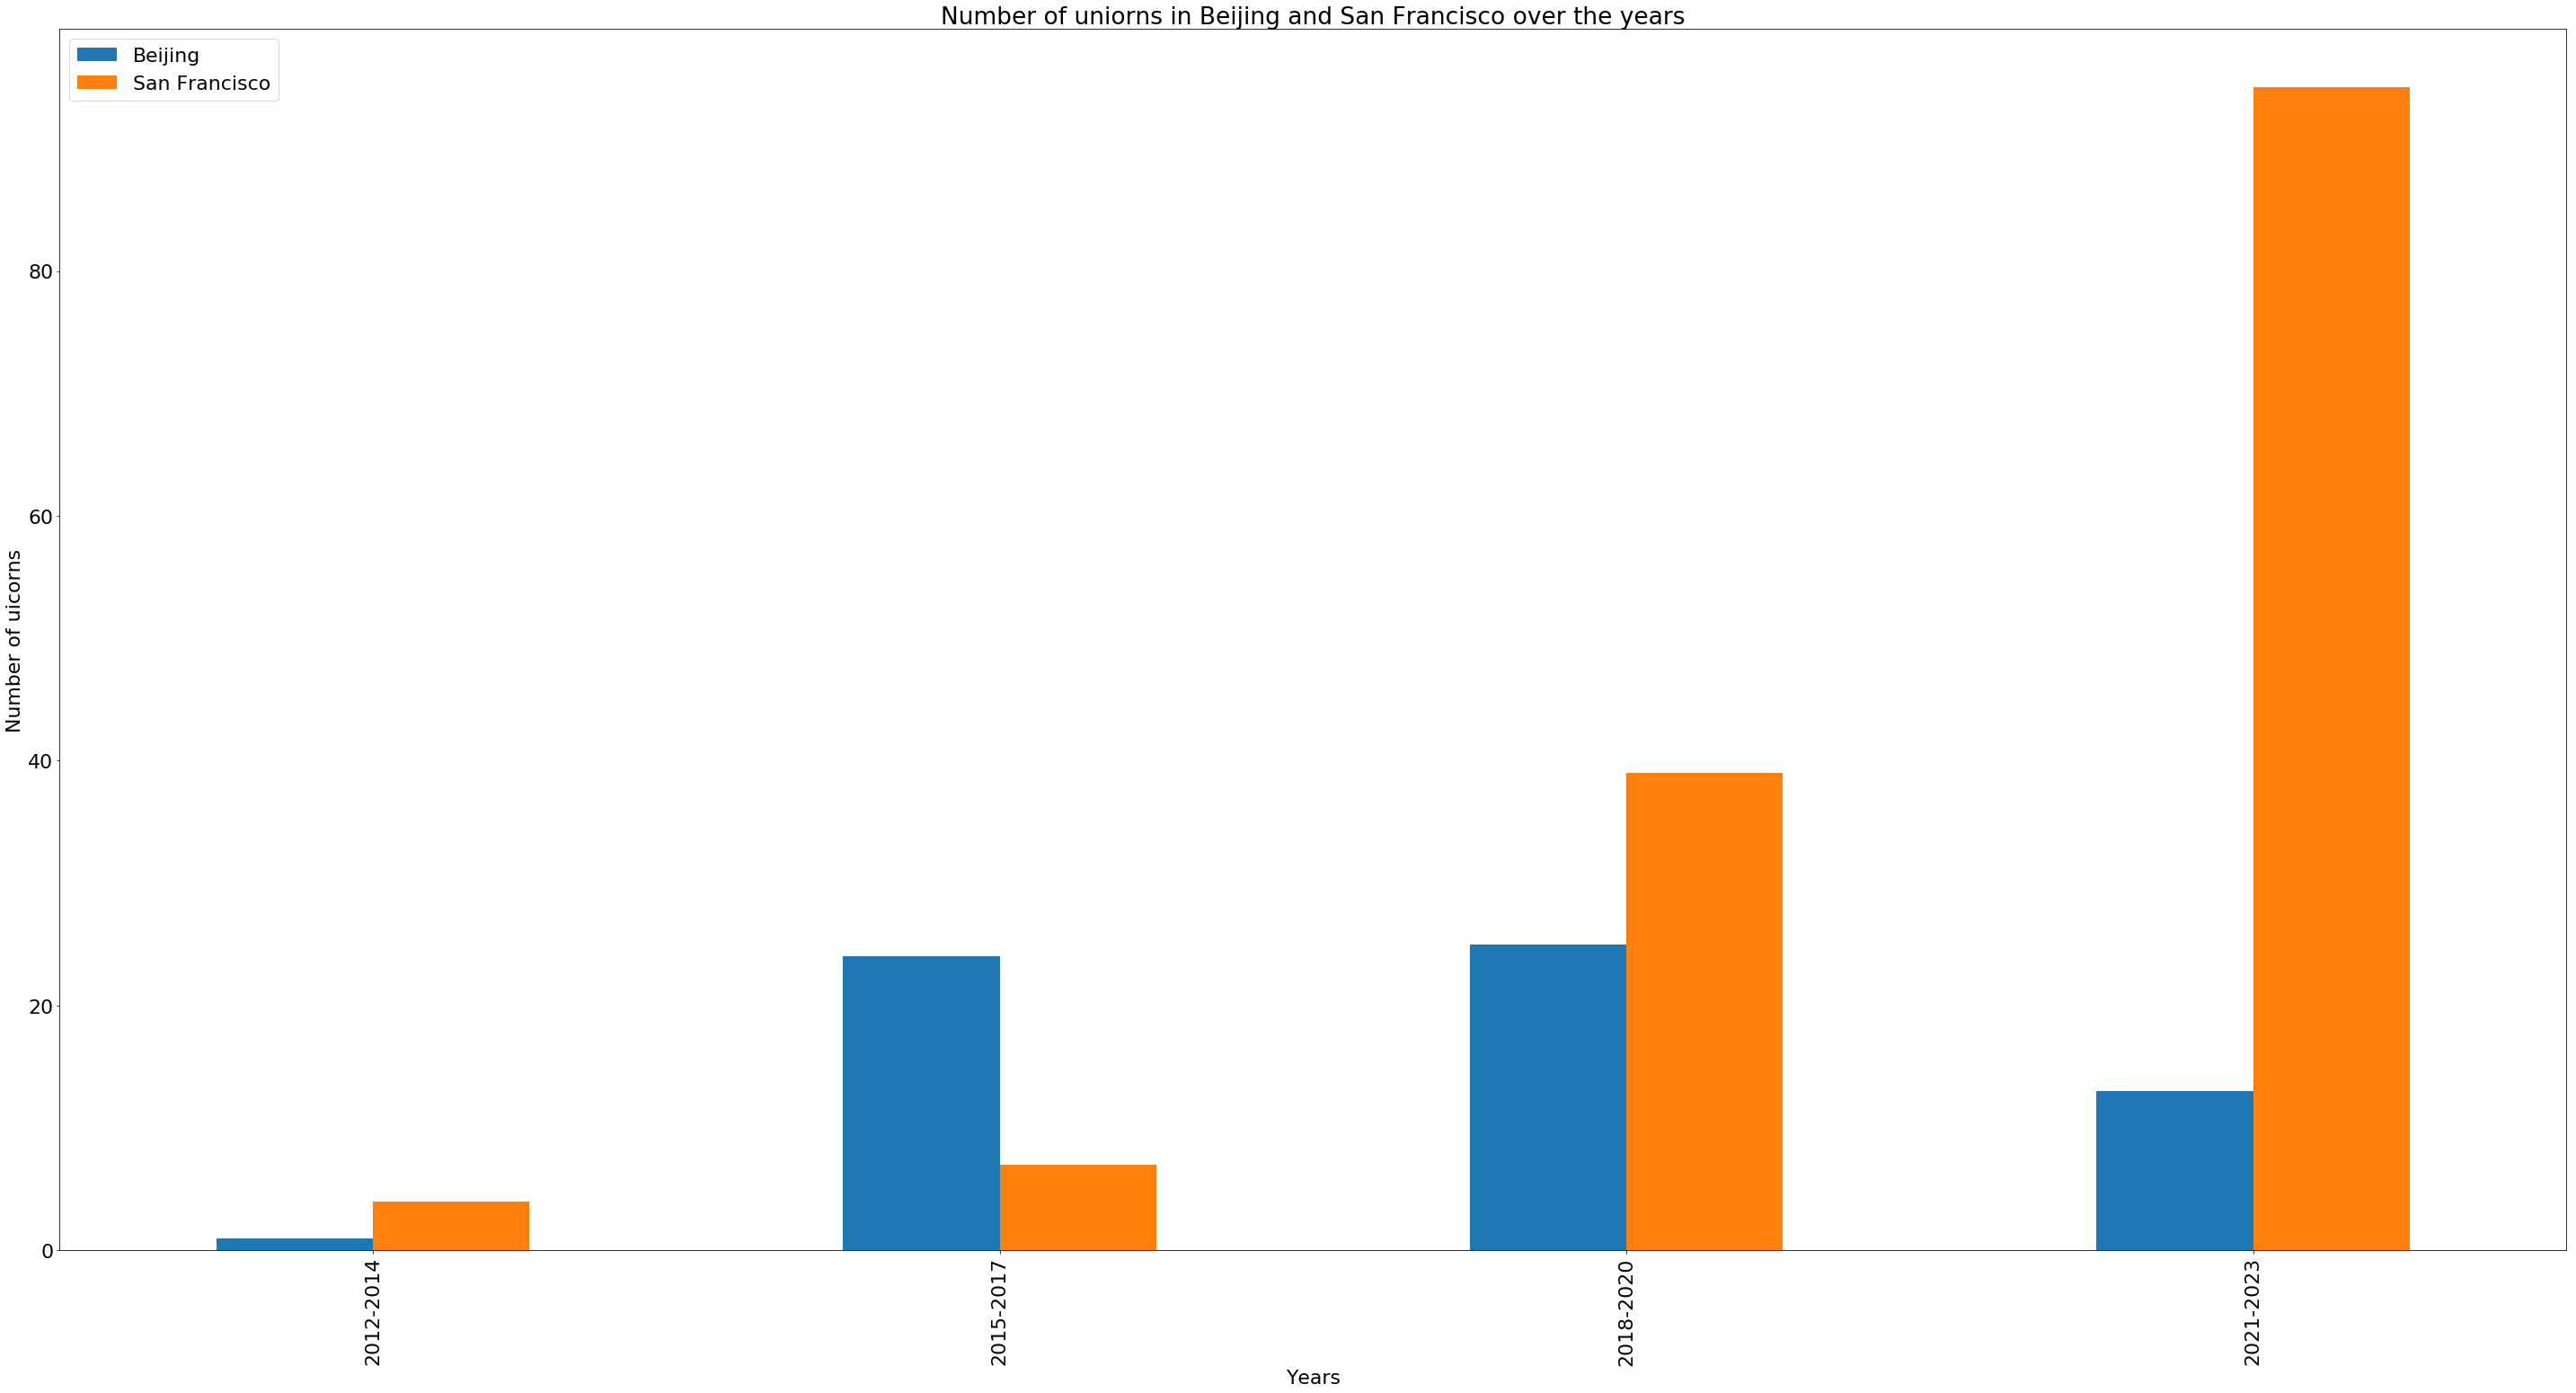

In [22]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

#We finally plot the graph based on the data.
df15.plot.bar(figsize=(50,25))

plt.xlabel("Years")
plt.ylabel("Number of uicorns")
plt.title("Number of uniorns in Beijing and San Francisco over the years")

plt.legend(['Beijing','San Francisco'])
plt.show()

#### False
We can see from the above graph that the number of unicorns in San Francisco(39) is more than that of Beijing(25) in the duration between 2018 to 2020. However, we can see that there are some cases like 2015-2017 where the case was reversed.

### Q6) China and India combined have more than 60% of all the Ed-tech companies present in the world. Is it true?

In [23]:
#First we find the data set of all the Edtech companies, then we find which country has how many unicorns and we sort it.
df16=df[df['Industry']=='Edtech'].groupby('Country').size().reset_index(name='counts').sort_values('counts', ascending=False)

#Next we change the index to the countries we considering.
df16.index=df16['Country'].tolist()

China            42.86
United States    25.00
India            21.43
Austria           3.57
Canada            3.57
Israel            3.57
Name: percentage, dtype: float64


c:\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


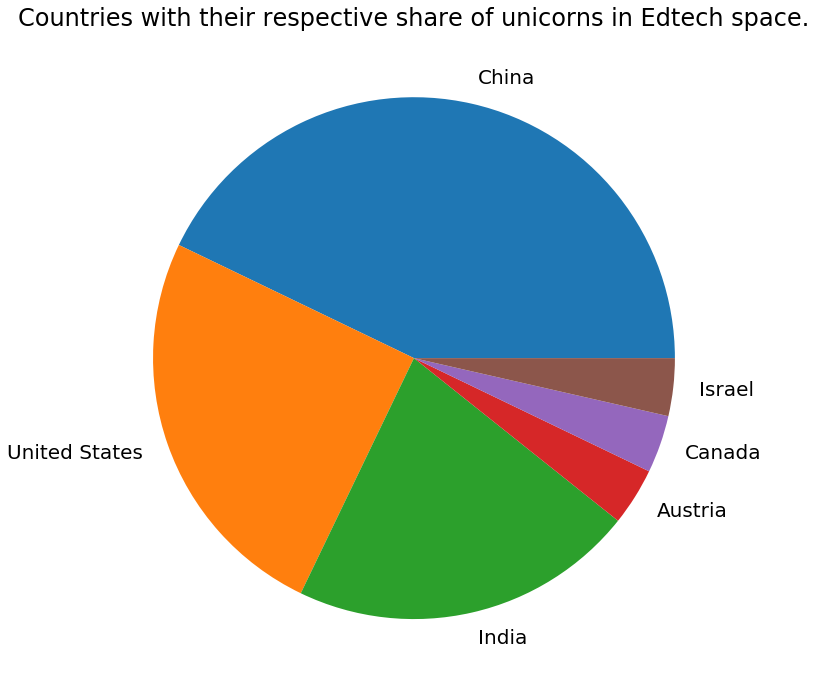

In [24]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

#Next we find the percentage of Ed-tech unicorns each country has.
df16['percentage'] =round(df16['counts'] / df16['counts'].sum() * 100,2)
print(df16['percentage'])

#Finally, we plot graph based on our current data.
df16['percentage'].plot(kind='pie', y='votes_of_each_class',figsize = (70, 12))
plt.title("Countries with their respective share of unicorns in Edtech space.")
plt.ylabel("")
plt.show()

#### True
We can see from the graph that China and India combined have 64.29% i.e more than 60% of the total number of unicorns in the Edtech Industry.

### Q7) Europe has more number acquired unicorns than there are unicorns in IPO stage in Asia, is it True?

In [25]:
#Frst we get the country name and financial stage data from the main data set. Along with removing all the unicorns which are
#still working independently, which is represented as 'None' in the dataset.
df18=df[['Country','Financial Stage']][df['Financial Stage']!='None']

#Next we find the content of the country using the 'pycountry_convert' package. Here we first convert the country name to a code
#and then convert the code to the continent code.
df18['continent'] =  [country_alpha2_to_continent_code(country_name_to_country_alpha2(x)) for x in df18['Country']]

#Then we find the total number of countries in certain financial stages, for each continent.
eu=df18[df18['continent']=='EU'].groupby('Financial Stage').size().reset_index(name='eu')
asia=df18[df18['continent']=='AS'].groupby('Financial Stage').size().reset_index(name='asia')

#Next, we combine both the continent's data and create a new data set.
df18=pd.merge(eu,asia,on='Financial Stage',how='outer')
df18.index=df18['Financial Stage'].tolist()
df18

,Financial Stage,eu,asia
Acq,Acq,2.0,2.0
Acquired,Acquired,6.0,5.0
Divestiture,Divestiture,2.0,3.0
Management,Management,1.0,NaN
Take,Take,1.0,NaN
Corporate,Corporate,NaN,1.0
IPO,IPO,NaN,7.0


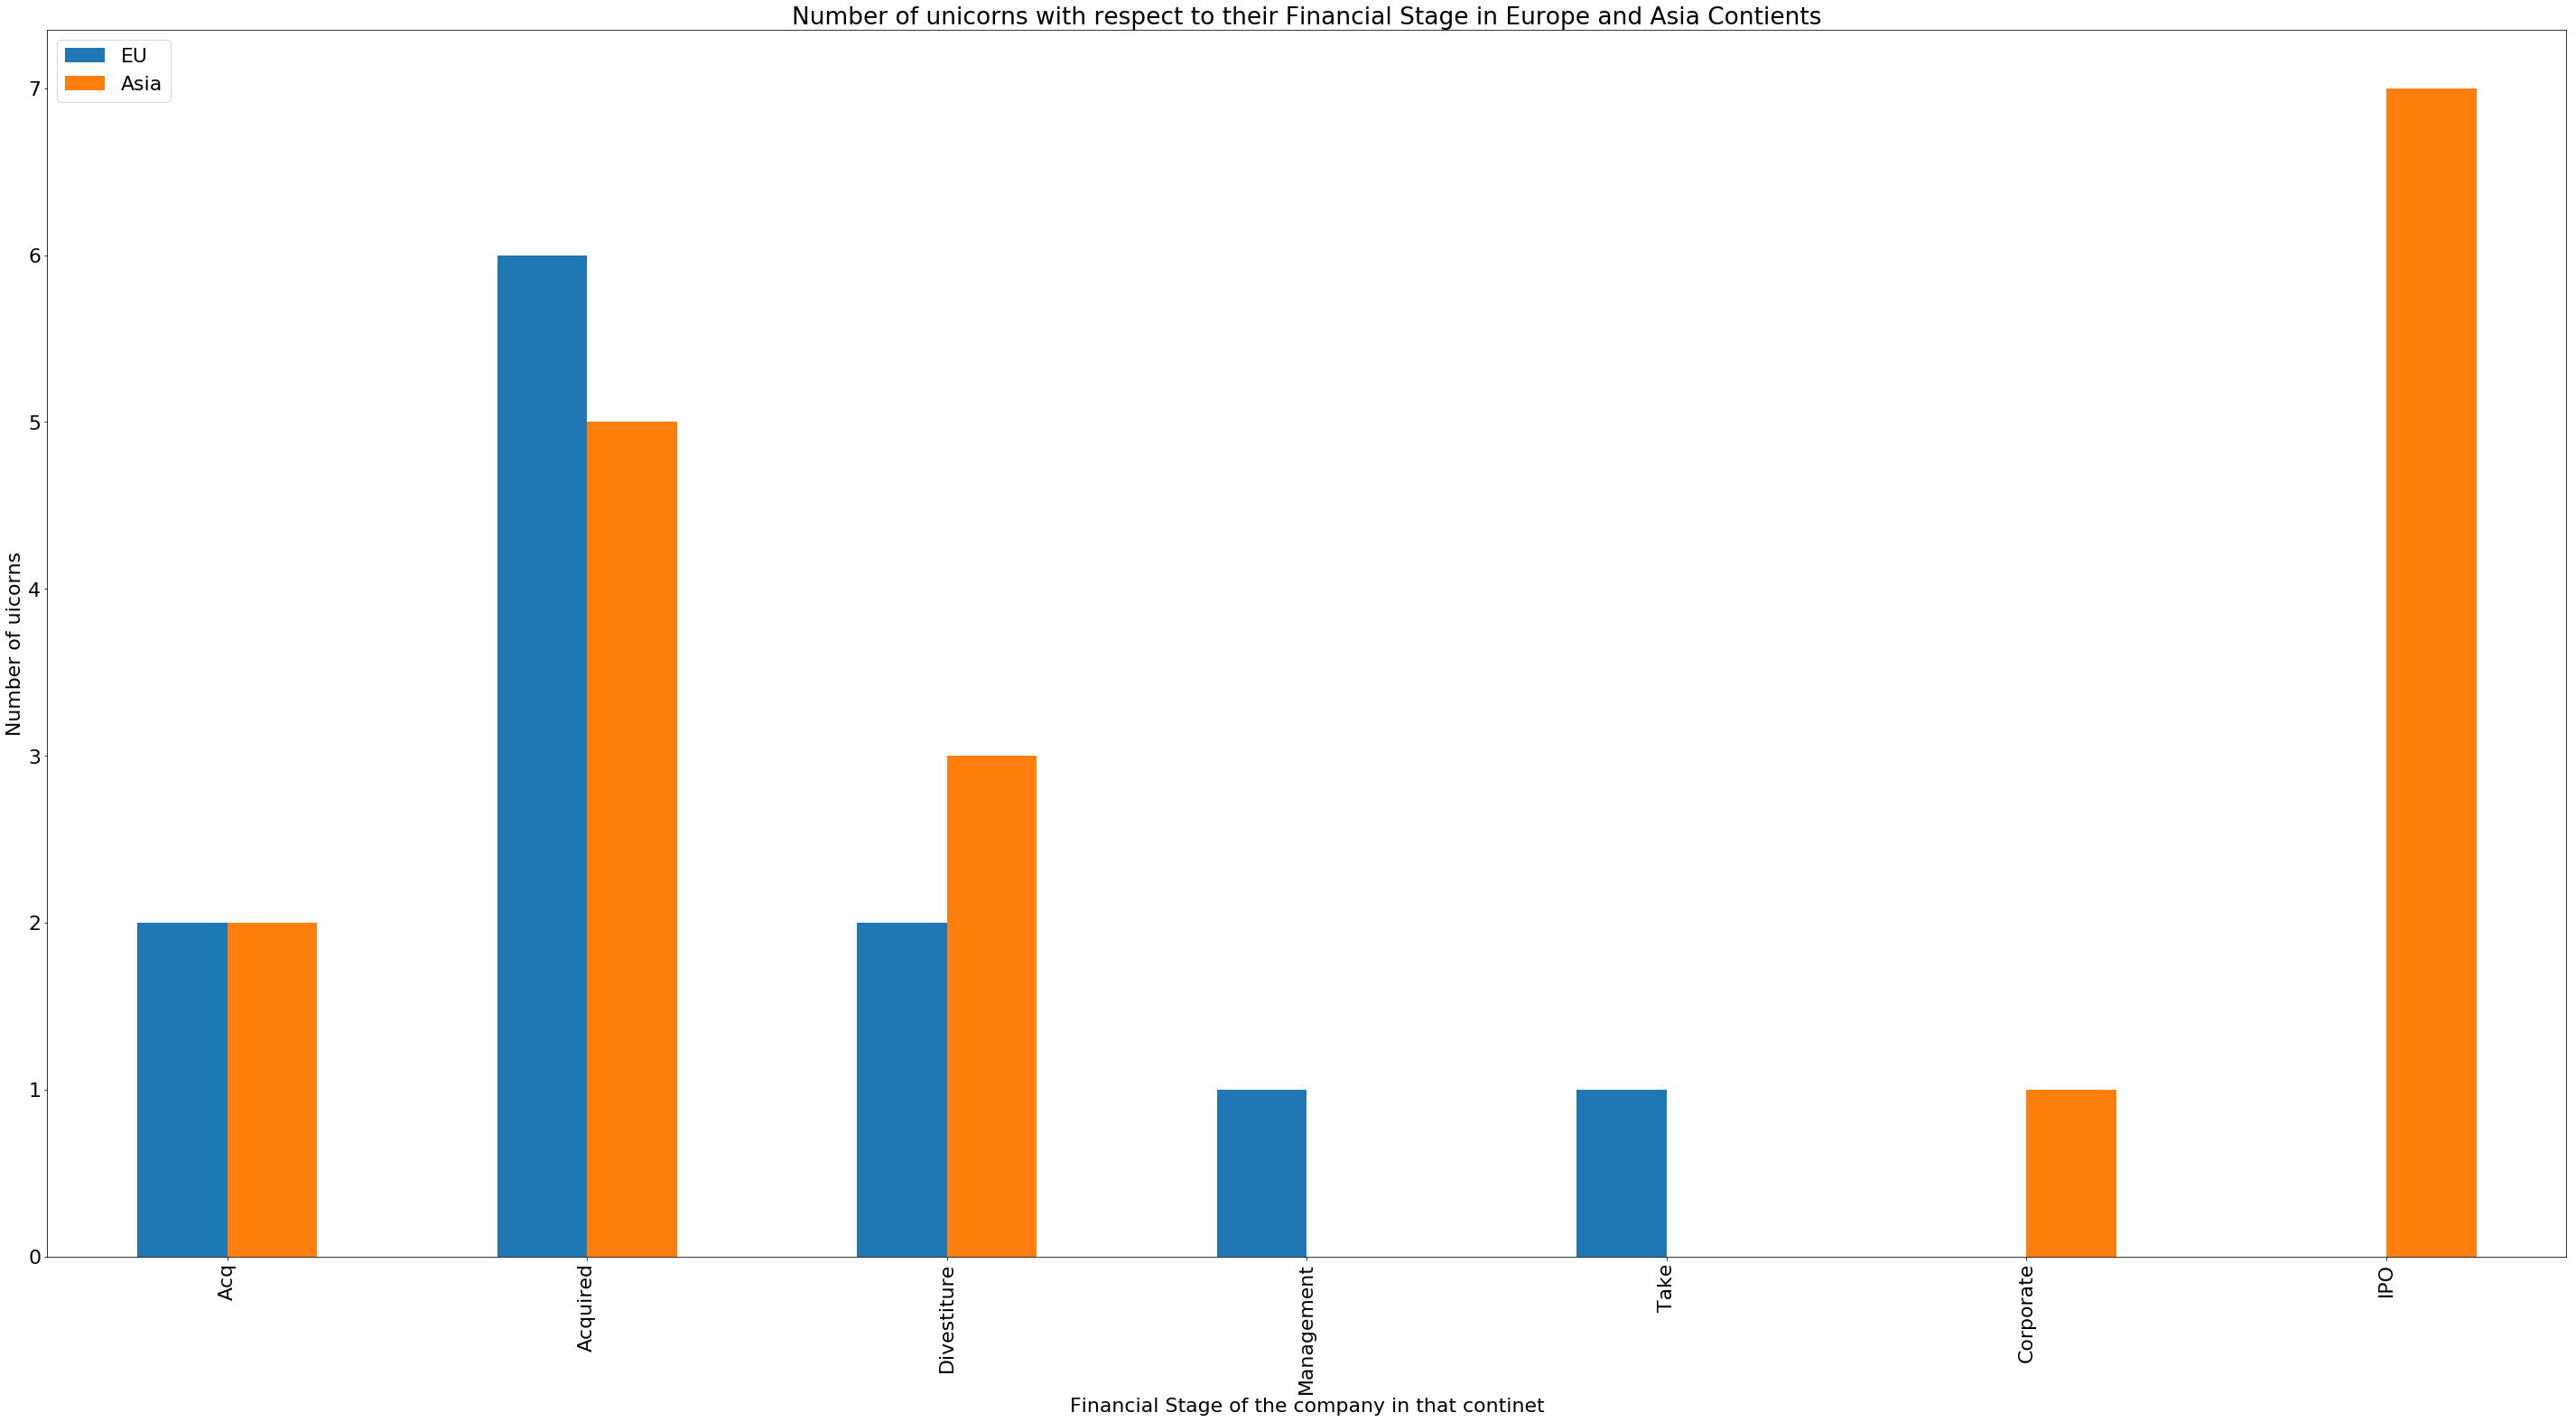

In [26]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

#Finally, we plot the graph from the combined data.
df18.plot.bar(figsize=(50,25))

plt.xlabel("Financial Stage of the company in that continet")
plt.ylabel("Number of uicorns")
plt.title("Number of unicorns with respect to their Financial Stage in Europe and Asia Contients")

plt.legend(['EU','Asia'])
plt.show()

#### True
We can see from the graph that more unicorns are in the IPO stage in Asia than unicorns that are acquired in Europe.

### Q8) From the top 50 unicorns, Sequoia Capital has more investments than Softbank Group. Or is it the other way around?

In [27]:
#First we get the data of top 50 unicorns.
df19=df.head(50)

#Next we get all the investors present in the top 50 unicorns into a list of each company, into a single list with duplicate 
#values in it. We also remove the space in front of the text to remove the distinction between the investor names.
investors=[ x.split(',') if x!='None' else [] for x in df19['Select Inverstors'].tolist()]
investors=[j[1:] if(j[0]==' ') else j for i in investors for j in i]

#Next we find how many times the investor's name is being repeated in the list and get the investments it made in total.
df19=pd.DataFrame(investors,columns=['investors'])
df19=df19.groupby('investors').size().reset_index(name='counts').sort_values('counts', ascending=False)
df19

,investors,counts
72,Sequoia Capital China,6
8,Andreessen Horowitz,4
71,Sequoia Capital,4
85,Tencent Holdings,4
18,Coatue Management,3
...,...,...
30,Felicis Ventures,1
29,F-Prime Capital,1
28,Essence Financial,1
27,ES Ventures,1


In [28]:
#We next find the data of our required investors i.e Sequoia Capital and Softbank Group.
required_investors=[x if('Sequoia Capital'in x or 'Softbank Group' in x) else '' for x in df19['investors'].tolist()]
df19=df19[df19['investors'].isin(required_investors)]
df19.index=df19['investors'].tolist()

#We place the Softbank Group data as green and Sequoia Capital data as blue.
condition=['blue' if ('Sequoia Capital' in x) else 'green' for x in df19['investors'].tolist()]

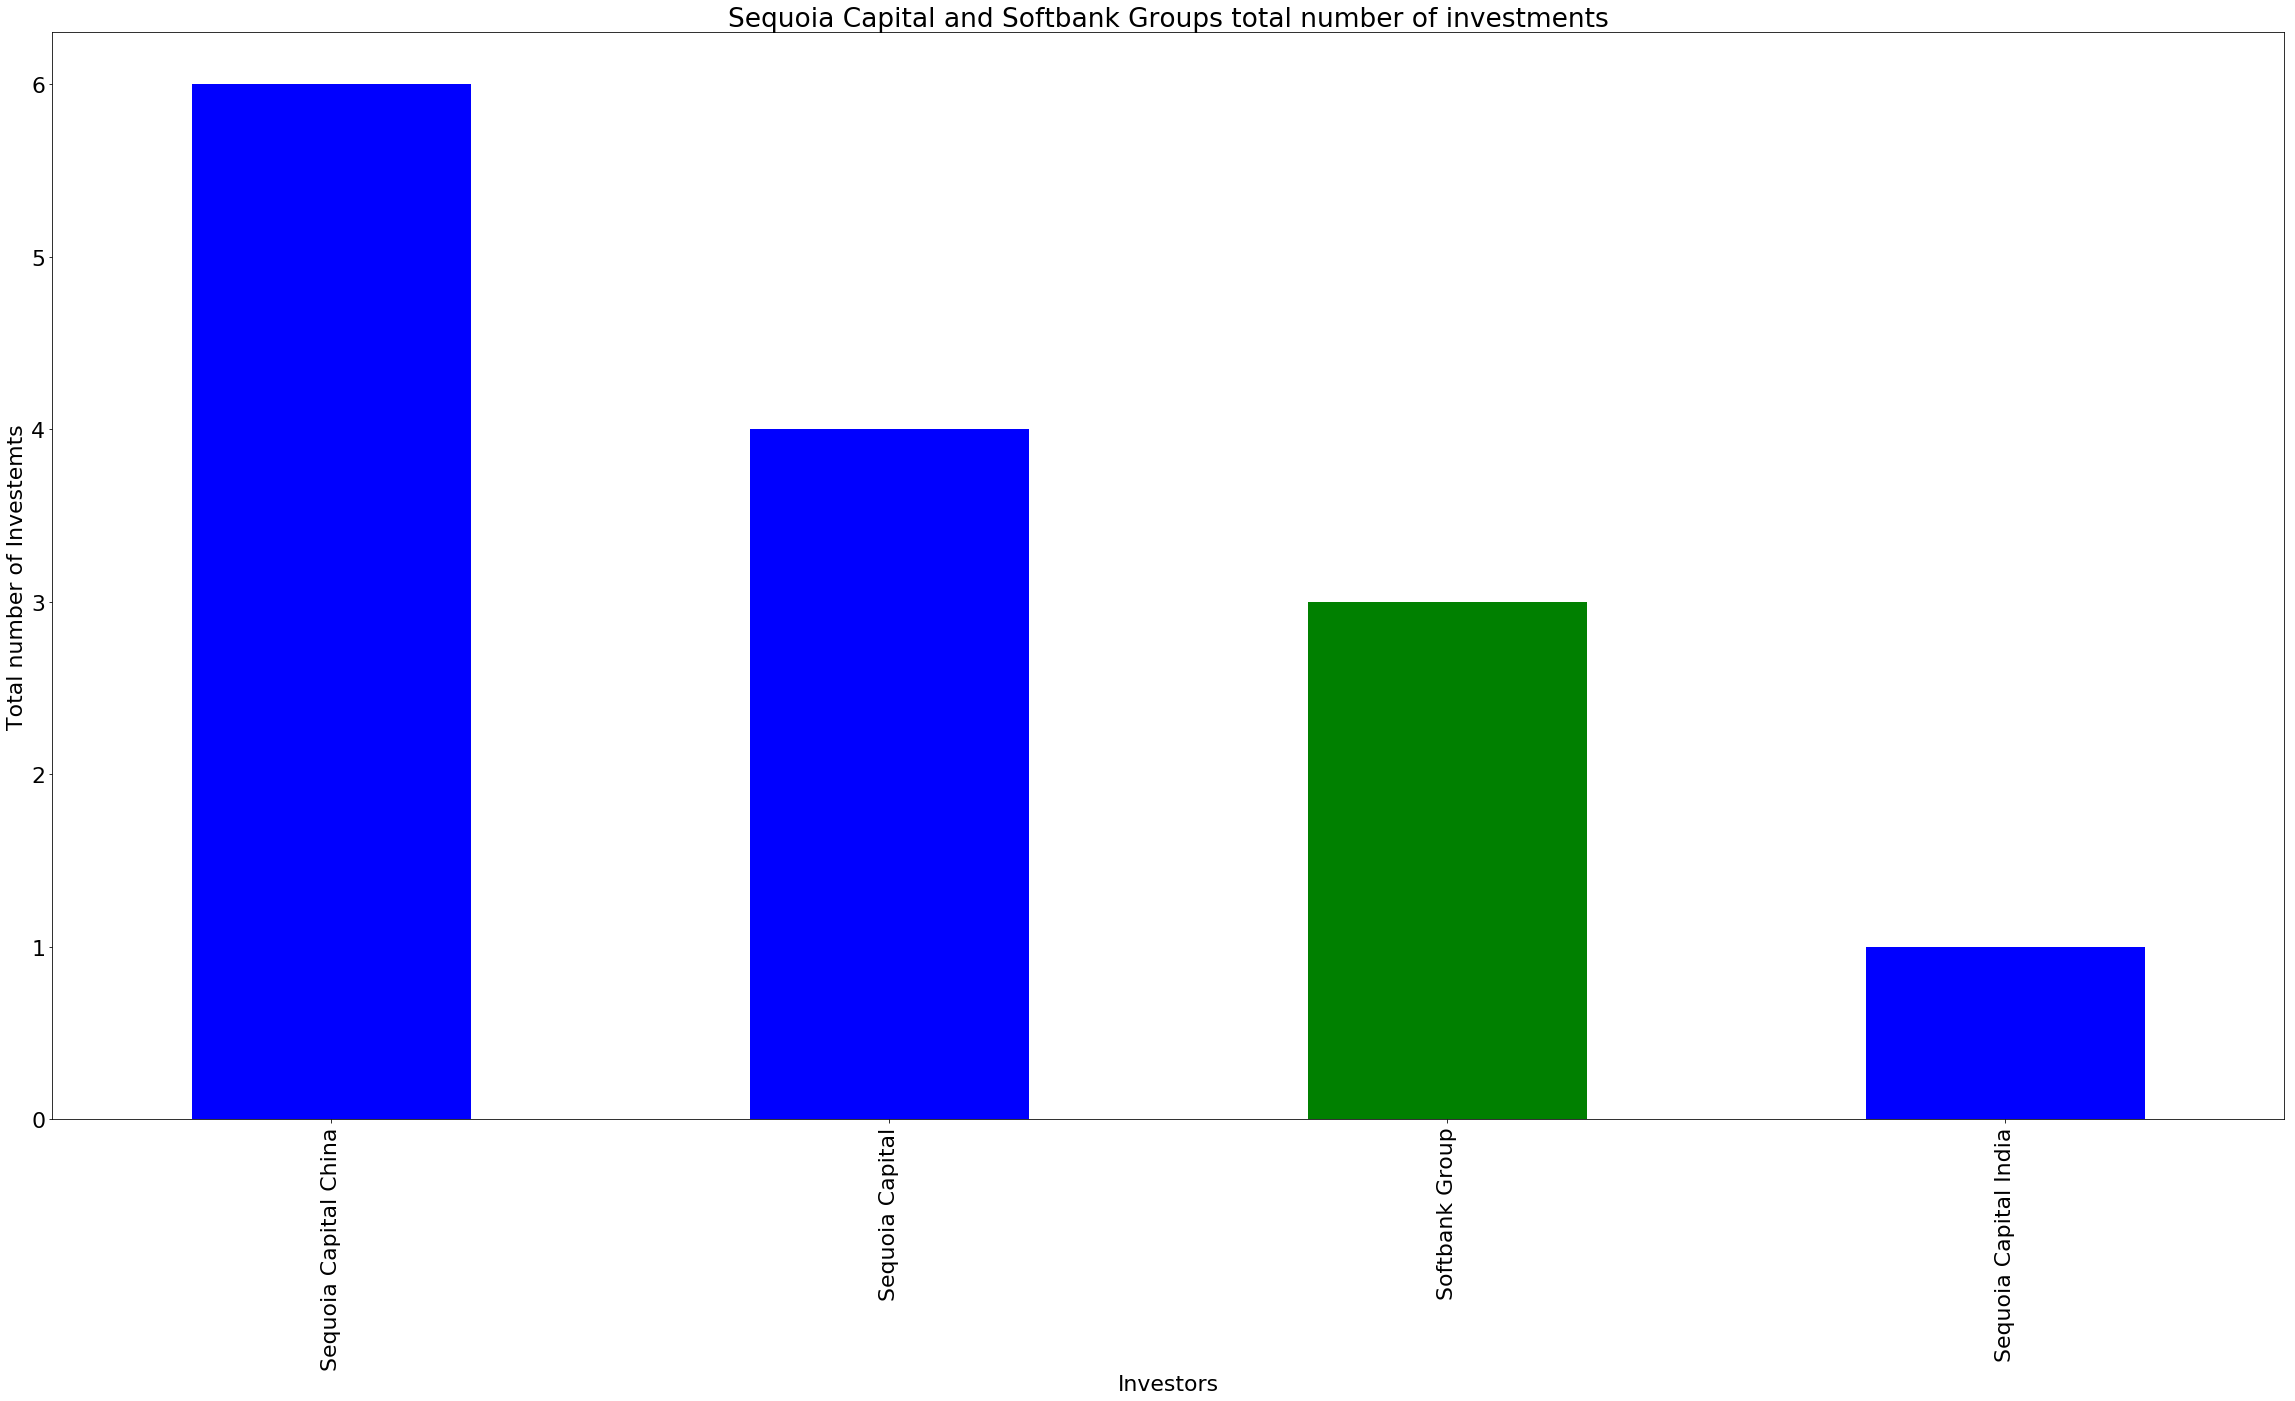

In [29]:
fig = plt.figure(figsize = (40, 20))

#We finally plot the data set we obtained.
df19['counts'].plot.bar(color=condition)
plt.xlabel("Investors")
plt.ylabel("Total number of Investemts")
plt.title("Sequoia Capital and Softbank Groups total number of investments")
plt.show()

#### True
We can see from the graph that Sequoia Capital China itself has more investments in the top 50 unicorns than all of Softbank investments.

### Q9) Indonesia has less number of investors than the 2 countries, which one position more and less in a list based unicorns count of that country. Is it true?

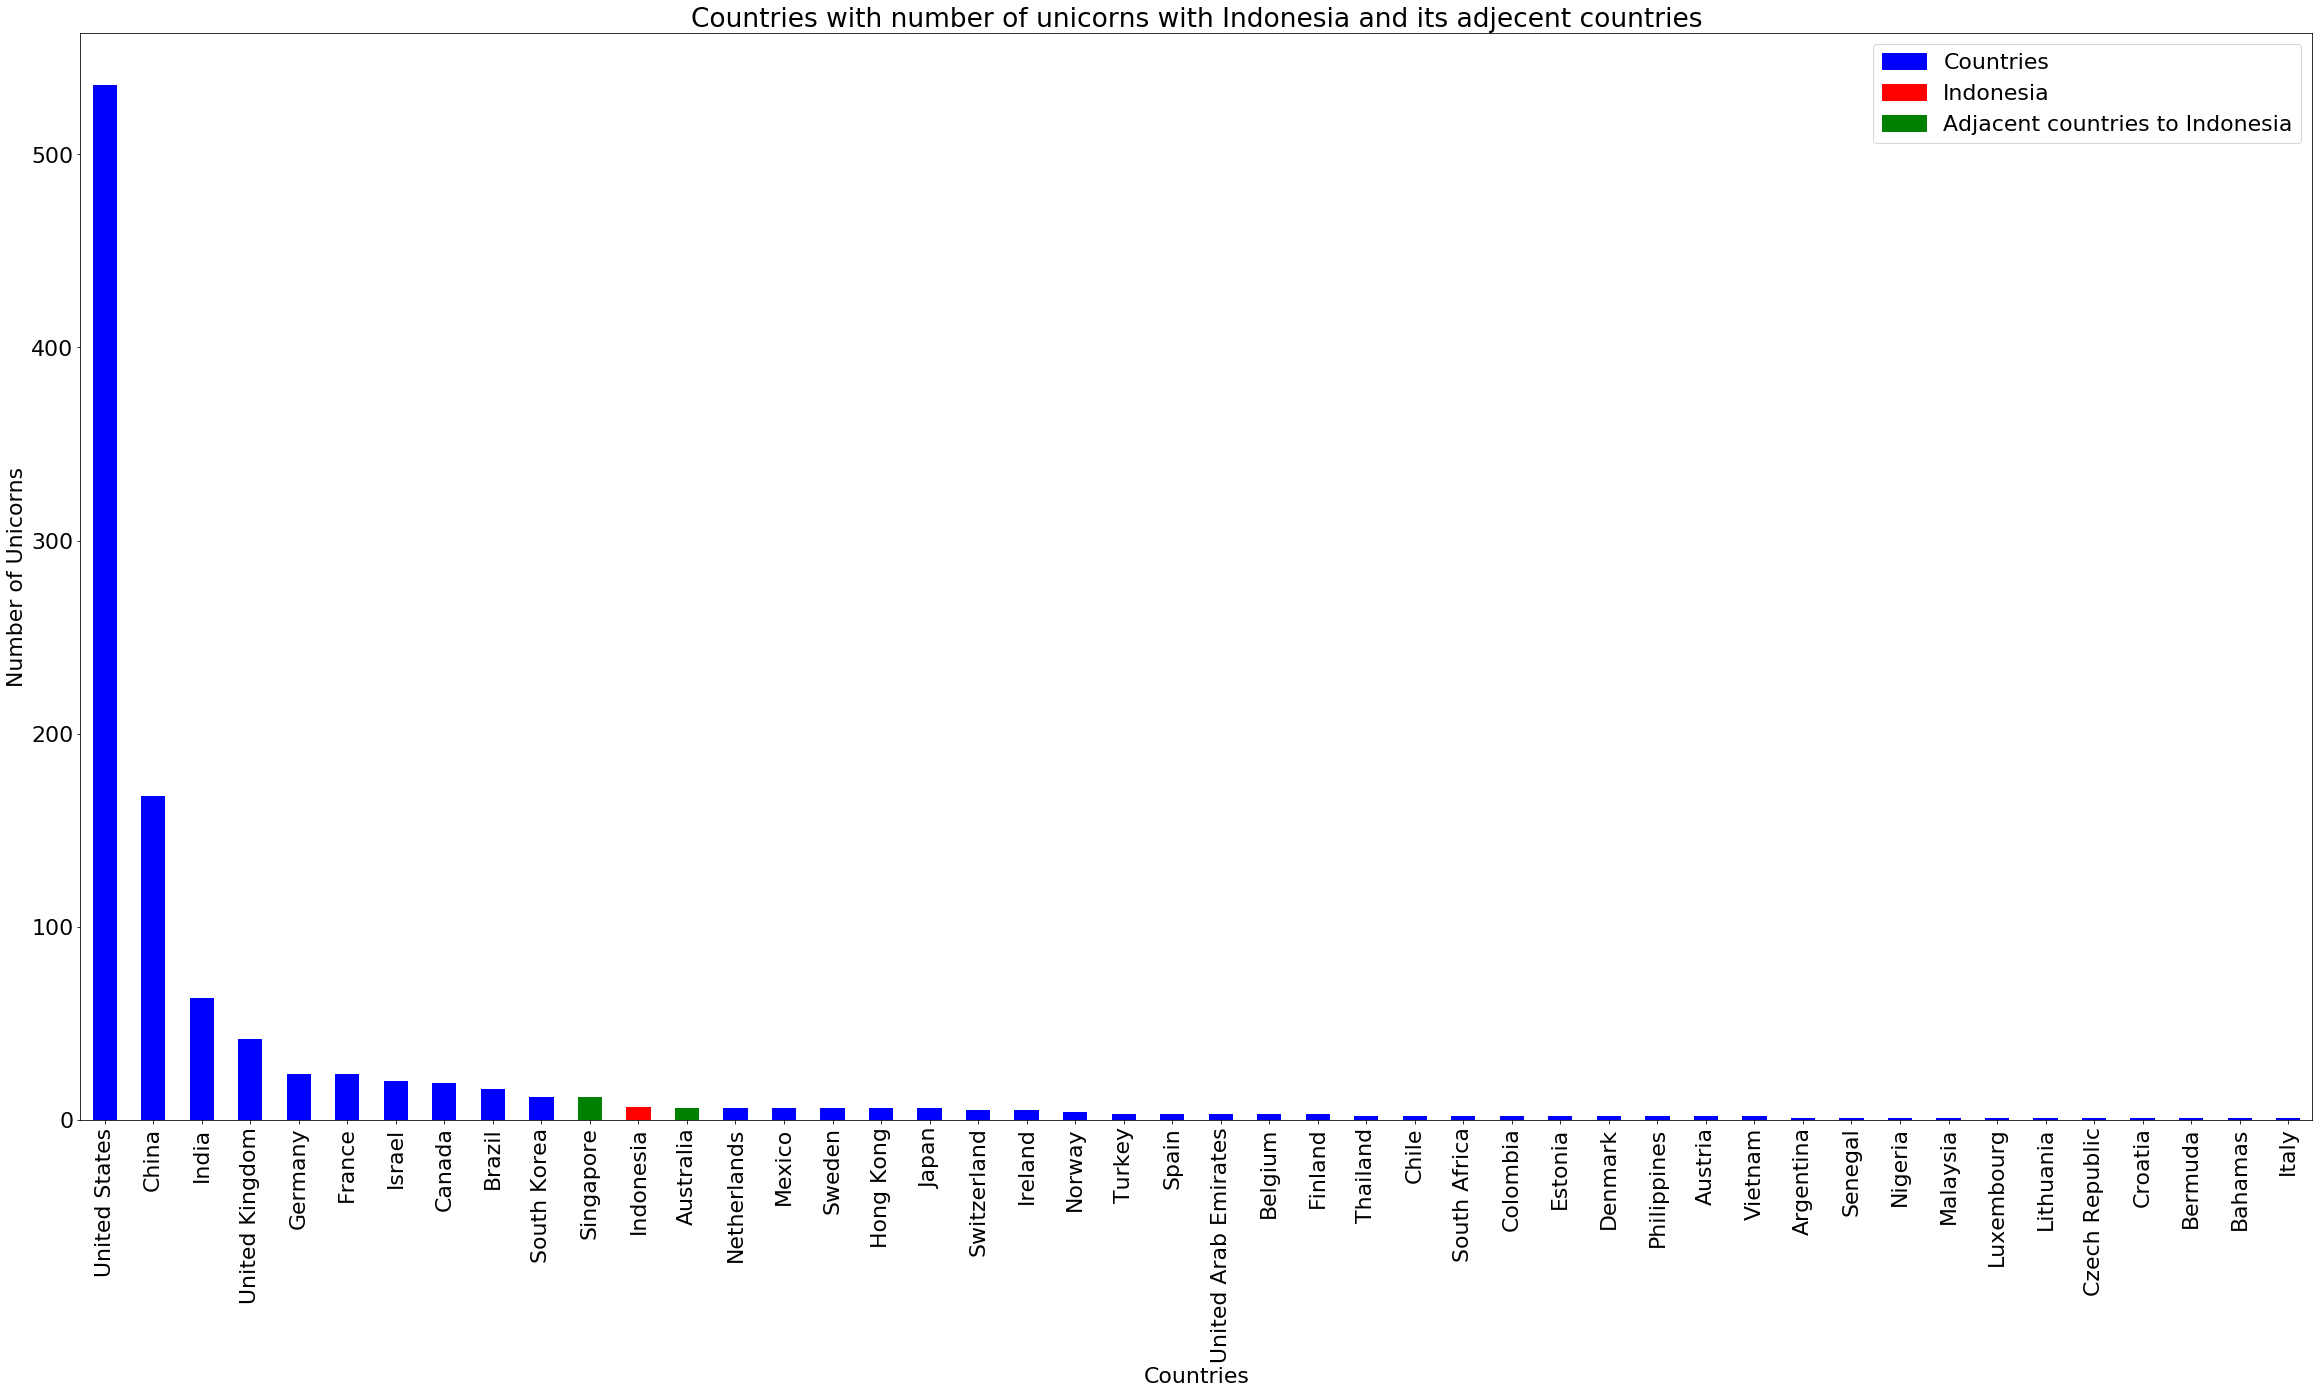

In [30]:
#First we get the data on the number of unicorns in each country.
df20=df.groupby('Country').size().reset_index(name='counts').sort_values('counts', ascending=False)
df20.index=df20['Country'].tolist()

#Then we place the Indonesia data in red, its adjacent data in green and the remaining data in blue.
condition =['red' if(df20['Country'].iloc[x] == 'Indonesia') else('green' if(df20['Country'].iloc[x-1] == 'Indonesia' or df20['Country'].iloc[x+1] == 'Indonesia') else 'blue') for x in range(2,len(df20)-1)]

#Then we plot the graph with the number of unicorns in each country.
fig = plt.figure(figsize = (40, 20))
df20['counts'].plot.bar(color=['blue','blue']+condition)
plt.xlabel("Countries")
plt.ylabel("Number of Unicorns")
plt.title("Countries with number of unicorns with Indonesia and its adjecent countries")

red = mpatches.Patch(color='#FF0000', label='Indonesia')
blue = mpatches.Patch(color='#0000FF', label='Countries')
green = mpatches.Patch(color='#008000', label='Adjacent countries to Indonesia')
plt.legend(handles=[blue,red,green])

plt.show()

In [31]:
#Here we first get the country and investor's data. Then find the number of investors in each country.
df21=df[['Country','Select Inverstors']]
df21['Select Inverstors']=[ x.split(',') if x!='None' else [] for x in df21['Select Inverstors']]
df21=df21.groupby('Country').agg({'Select Inverstors': 'sum'}).reset_index()
df21['Select Inverstors']=[len(list(set(x))) for x in df21['Select Inverstors']]

#Next we combine the data with unicorn count and investor count based on the country into a single data set.
#Next we sort the graph based on the unicorn count. 
df22=pd.merge(df20,df21,on='Country').sort_values('counts', ascending=False)
df22.rename(columns={'counts': 'unicorns', 'Select Inverstors': 'Investors'}, inplace=True)
df22

c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,unicorns,Investors
0,United States,536,794
1,China,168,313
2,India,63,120
3,United Kingdom,42,99
4,Germany,24,61
5,France,24,58
6,Israel,20,50
7,Canada,19,53
8,Brazil,16,37
9,South Korea,12,24


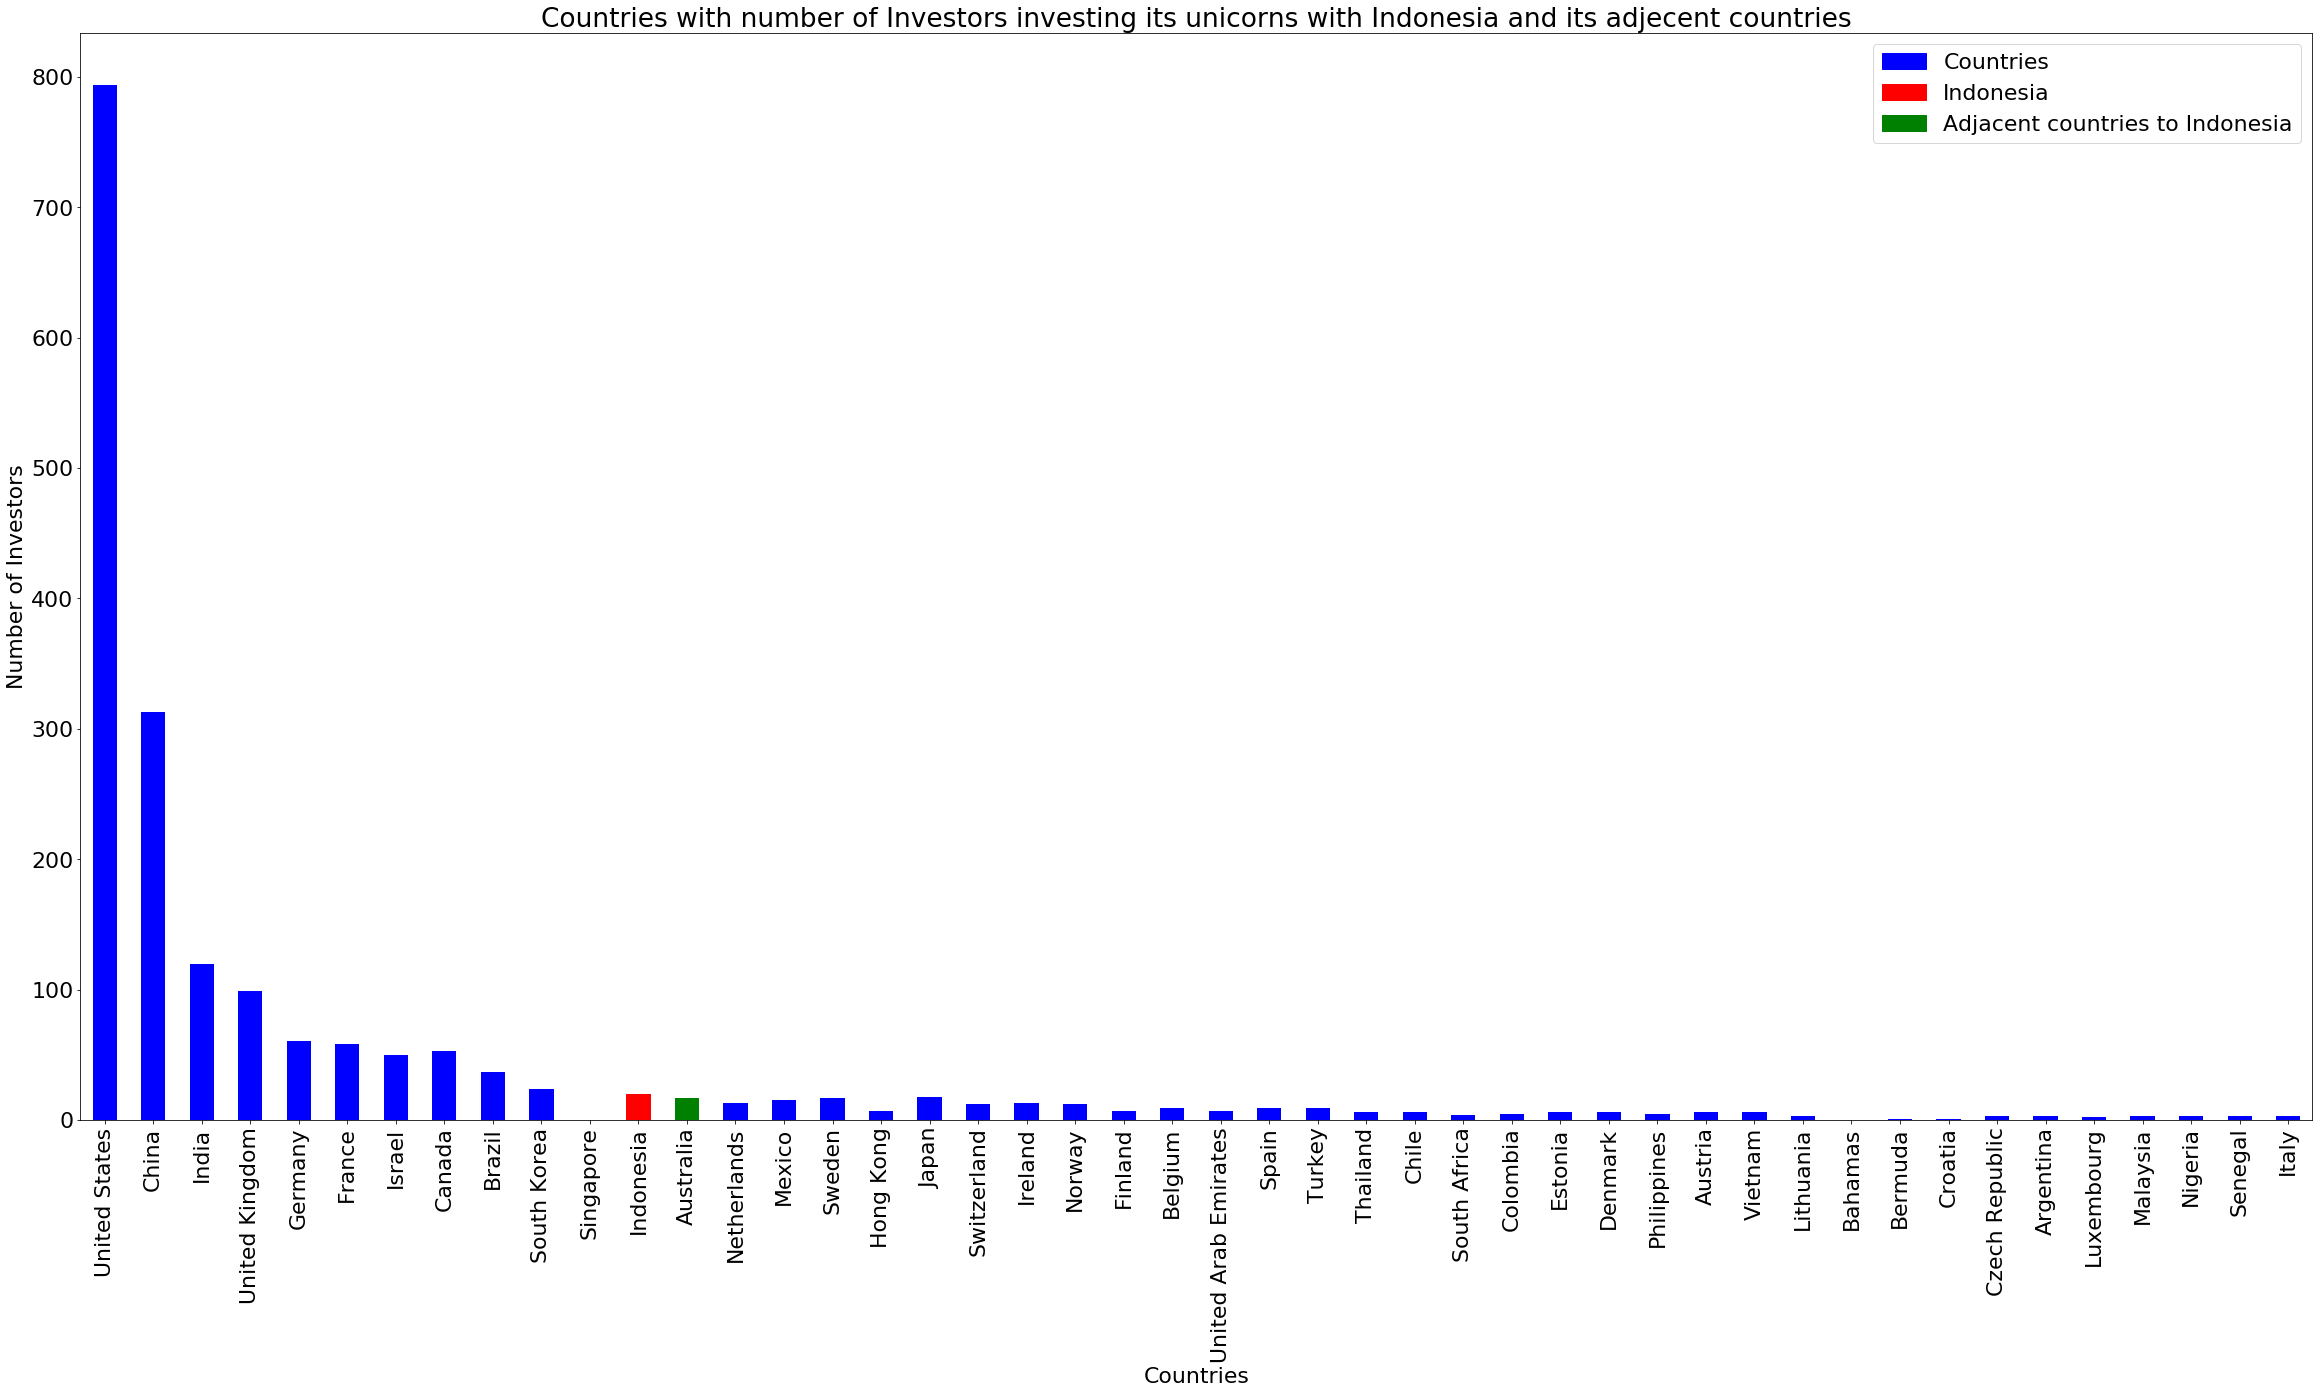

In [32]:
#Finally we plot a graph with the investor count data, in a unicorn count order for each country.
fig = plt.figure(figsize = (40, 20))
df22.index=df22['Country'].tolist()
df22['Investors'].plot.bar(color=['blue','blue']+condition)
plt.xlabel("Countries")
plt.ylabel("Number of Investors")
plt.title("Countries with number of Investors investing its unicorns with Indonesia and its adjecent countries")

red = mpatches.Patch(color='#FF0000', label='Indonesia')
blue = mpatches.Patch(color='#0000FF', label='Countries')
green = mpatches.Patch(color='#008000', label='Adjacent countries to Indonesia')
plt.legend(handles=[blue,red,green])

plt.show()

#### False
We can see from the graph that Indonesia has more investors than Singapore and Australia, in fact, Singapore's unicorn companies have no investors.